In [607]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [608]:
def Random(K_number, R_sigma, Q_star, T):
    K=np.arange(K_number)
    Q = np.zeros(K_number)
    count = np.zeros(K_number)
    
    r_list = [] # to store average rewards list
    arms_rewards_list = [[0],[0],[0],[0]] # to save rewards of each rewards
    actions_list = []
    best_choice_percentage = [0]
    best_choice_count = 0

    r_total = 0 # total rewards
    for i in range(T):

        k = random.choice(K)
        actions_list.append(k)
        if k==0:
            best_choice_count += 1
            best_choice_percentage.append(best_choice_count/(i+1))
        else: 
            best_choice_percentage.append(best_choice_percentage[-1])

        v = np.random.normal(Q_star[k], R_sigma[k]) # gaussian distribution rewards
        r_total += v
        r_list.append(r_total)

        Q[k] = (Q[k]*count[k]+v)/(count[k]+1)
        count[k] = count[k] + 1
        
        for it_arm in range(4):
            if it_arm == k:
                arms_rewards_list[it_arm].append(Q[k])
            else:
                arms_rewards_list[it_arm].append(arms_rewards_list[it_arm][-1])

    return r_total, r_list, count, arms_rewards_list, actions_list, best_choice_percentage

In [609]:
"""Greedy"""
def Greedy(K_number, R_sigma, Q_star, eplison, T):
    K=np.arange(K_number)
    Q = np.zeros(K_number)
    count = np.zeros(K_number)
    
    r_list = [] # to store average rewards list
    arms_rewards_list = [[0],[0],[0],[0]] # to save rewards of each rewards
    actions_list = []
    best_choice_percentage = [0]
    best_choice_count = 0
    
    r_total = 0
    for i in range(T):

        if random.random() < eplison:
            k = random.choice(K)
        else:
            if max(Q) == 0: 
                arm_0_list = [it_i for it_i, it_j in enumerate(Q) if it_j == 0]
                k = random.choice(arm_0_list)
            else:
                k = np.argmax(Q)
        actions_list.append(k)
        if k==0:
            best_choice_count += 1
            best_choice_percentage.append(best_choice_count/(i+1))
        else: 
            best_choice_percentage.append(best_choice_percentage[-1])

        v = np.random.normal(Q_star[k], R_sigma[k]) # gaussian distribution rewards
        r_total += v
        r_list.append(r_total)

        Q[k] = (Q[k]*count[k]+v)/(count[k]+1)
        count[k] = count[k] + 1
        for it_arm in range(4):
            if it_arm == k:
                arms_rewards_list[it_arm].append(Q[k])
            else:
                arms_rewards_list[it_arm].append(arms_rewards_list[it_arm][-1])
   
    return r_total, r_list, count, arms_rewards_list, actions_list, best_choice_percentage

In [610]:
"""Softmax"""
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

def Softmax(K_number, R_sigma, Q_star, tau, T):
    K=np.arange(K_number)
    Q = np.zeros(K_number)
    count = np.zeros(K_number)
    
    r_list = [] # to store average rewards list
    arms_rewards_list = [[0],[0],[0],[0]] # to save rewards of each rewards
    actions_list = []
    best_choice_percentage = [0]
    best_choice_count = 0
    
    r_total = 0
    for i in range(T):
        
        prob = softmax(Q/tau)
        rand = random.random()
        
        total_pb = 0
        for pb_i in range(K_number):
            total_pb += prob[pb_i]
            if total_pb >= rand:
                k = pb_i
                break
        actions_list.append(k)
        if k==0:
            best_choice_count += 1
            best_choice_percentage.append(best_choice_count/(i+1))
        else: 
            best_choice_percentage.append(best_choice_percentage[-1])

        v = np.random.normal(Q_star[k], R_sigma[k]) # gaussian distribution rewards
        r_total += v
        r_list.append(r_total)

        Q[k] += (v-Q[k])/(count[k]+1)
        count[k] = count[k] + 1
        for it_arm in range(4):
            if it_arm == k:
                arms_rewards_list[it_arm].append(Q[k])
            else:
                arms_rewards_list[it_arm].append(arms_rewards_list[it_arm][-1])

    return r_total, r_list, count, arms_rewards_list, actions_list, best_choice_percentage

In [611]:
"""Greedy time-varying parameter"""
def Greedy_time(K_number, R_sigma, Q_star, T):
    K=np.arange(K_number)
    Q = np.zeros(K_number)
    count = np.zeros(K_number)
    
    r_list = [] # to store average rewards list
    arms_rewards_list = [[0],[0],[0],[0]] # to save rewards of each rewards
    actions_list = []
    best_choice_percentage = [0]
    best_choice_count = 0
    
    r_total = 0
    for i in range(T):

        eplison = 1/math.sqrt(i+1)
        if random.random() < eplison:
            k = random.choice(K)
        else:
            k = np.argmax(Q)
        actions_list.append(k)
        if k==0:
            best_choice_count += 1
            best_choice_percentage.append(best_choice_count/(i+1))
        else: 
            best_choice_percentage.append(best_choice_percentage[-1])

        v = np.random.normal(Q_star[k], R_sigma[k]) # gaussian distribution rewards
        r_total += v
        r_list.append(r_total)

        Q[k] = (Q[k]*count[k]+v)/(count[k]+1)
        count[k] = count[k] + 1
        for it_arm in range(4):
            if it_arm == k:
                arms_rewards_list[it_arm].append(Q[k])
            else:
                arms_rewards_list[it_arm].append(arms_rewards_list[it_arm][-1])
  
    return r_total, r_list, count, arms_rewards_list, actions_list, best_choice_percentage

In [612]:
"""Softmax_time"""
def Softmax_time(K_number, R_sigma, Q_star, tau_initial, T):
    K=np.arange(K_number)
    Q = np.zeros(K_number)
    count = np.zeros(K_number)
    
    r_list = [] # to store average rewards list
    arms_rewards_list = [[0],[0],[0],[0]] # to save rewards of each rewards
    actions_list = []
    best_choice_percentage = [0]
    best_choice_count = 0
    
    r_total = 0
    for i in range(T):
        
        tau = tau_initial*(1000-i+1)/1000
        prob = softmax(Q/tau)
        rand = random.random()
        
        total_pb = 0
        for pb_i in range(K_number):
            total_pb += prob[pb_i]
            if total_pb >= rand:
                k = pb_i
                break
        actions_list.append(k)
        if k==0:
            best_choice_count += 1
            best_choice_percentage.append(best_choice_count/(i+1))
        else: 
            best_choice_percentage.append(best_choice_percentage[-1])
            
        v = np.random.normal(Q_star[k], R_sigma[k]) # gaussian distribution rewards
        r_total += v
        r_list.append(r_total)

        Q[k] += (v-Q[k])/(count[k]+1)
        count[k] = count[k] + 1
        for it_arm in range(4):
            if it_arm == k:
                arms_rewards_list[it_arm].append(Q[k])
            else:
                arms_rewards_list[it_arm].append(arms_rewards_list[it_arm][-1])
        
    return r_total, r_list, count, arms_rewards_list, actions_list, best_choice_percentage

In [613]:
"""Average reward, do 100 Times"""
K_number = 4
Q_star = [2.3, 2.1, 1.5, 1.3] # Rewards normal probability distribution mean
R_sigma = [0.9, 0.6, 0.4, 2]  # Rewards normal probability distribution standard deviation
T = 1000

data_r = [[],[],[],[],[],[]]
data_count = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
data_mean_count = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]

Times = 0
while Times<100:
    res1 = Random(K_number, R_sigma, Q_star, T)
    data_r[0].append(res1[0])
    for i in range(4):
        data_count[0][i].append(res1[2][i])

    res2 = Greedy(K_number, R_sigma, Q_star, 0, T)
    data_r[1].append(res2[0])
    for i in range(4):
        data_count[1][i].append(res2[2][i])
    
    res3 = Greedy(K_number, R_sigma, Q_star, 0.1, T)
    data_r[2].append(res3[0])
    for i in range(4):
        data_count[2][i].append(res3[2][i])
    
    res4 = Greedy(K_number, R_sigma, Q_star, 0.2, T)
    data_r[3].append(res4[0])
    for i in range(4):
        data_count[3][i].append(res4[2][i])
    
    res5 = Softmax(K_number, R_sigma, Q_star, 1, T)
    data_r[4].append(res5[0])
    for i in range(4):
        data_count[4][i].append(res5[2][i])
    
    res6 = Softmax(K_number, R_sigma, Q_star, 0.1, T)
    data_r[5].append(res6[0])
    for i in range(4):
        data_count[5][i].append(res6[2][i])
    
    Times += 1
    
for i in range(6):
    for j in range(4):
        data_mean_count[i][j] = np.mean(data_count[i][j])

[1798.4830451012601, 1882.3355891663823, 2205.601335825044, 2178.5309276909234, 1963.2643789463039, 1858.8815902325302]
[46.34034175305047, 400.7873218245263, 58.619624458913954, 41.7322238234611, 37.83043244285492, 393.4981457242574]


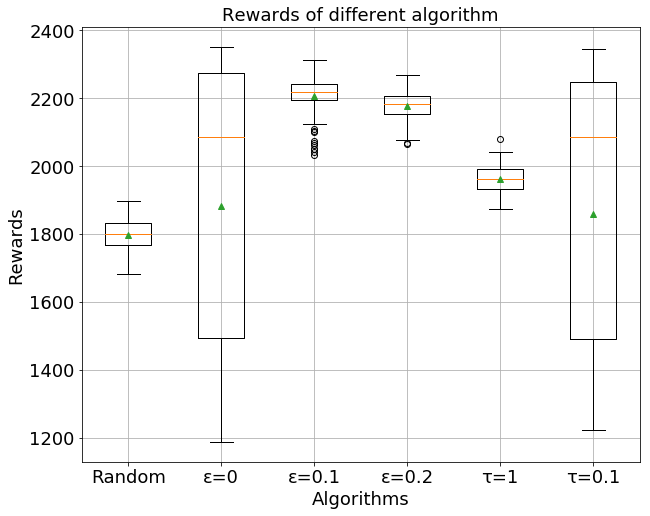

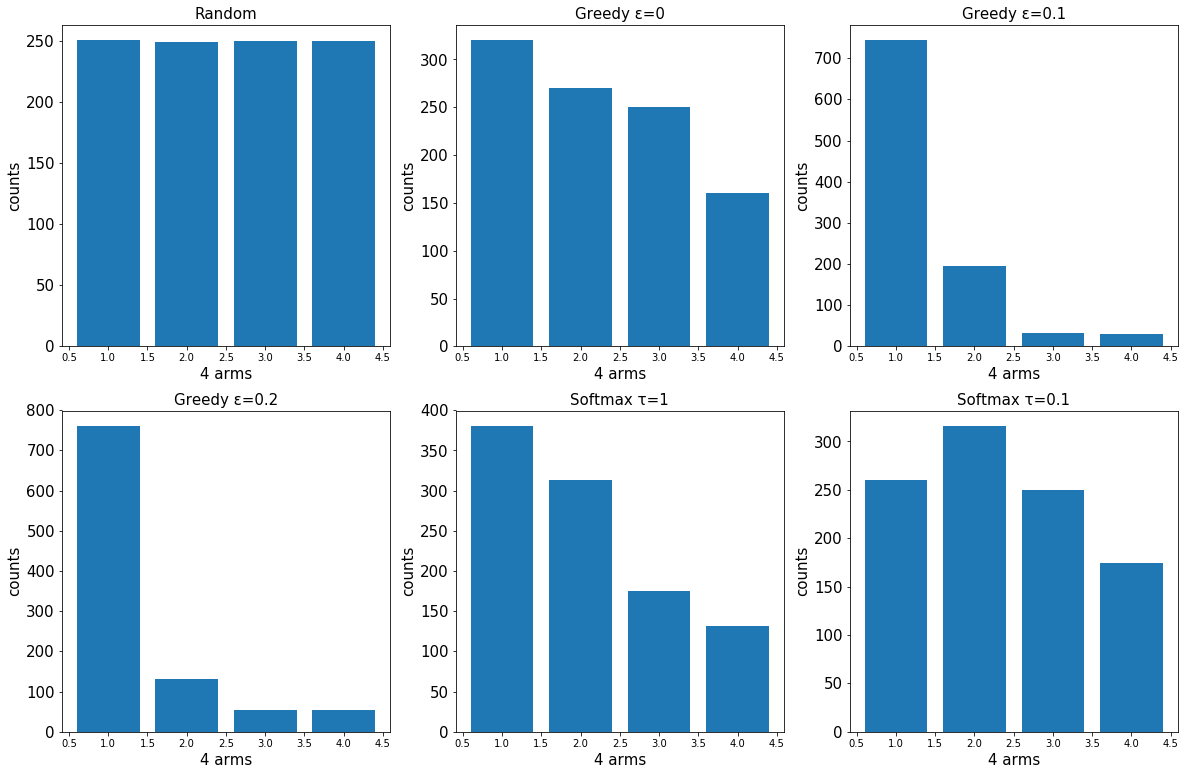

In [614]:
"""each algo average rewards plot"""
means = [[],[],[],[],[],[]]
diviations = [[],[],[],[],[],[]]
for i in range(6):
    means[i] = np.mean(data_r[i])
    diviations[i] = np.std(data_r[i])
print(means)
print(diviations)

plt.figure(figsize=(10, 8))
labels = ["Random", "ε=0", "ε=0.1", "ε=0.2", "τ=1", "τ=0.1"]
res = plt.boxplot(data_r, labels = labels, showmeans=True)
plt.title('Rewards of different algorithm', fontsize = 18)
plt.xlabel('Algorithms', fontsize=18)
plt.ylabel('Rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.show()

"""count histogram plot"""
title_list = ['Random average counts histogram', 'Greedy ε=0 average counts histogram', 'Greedy ε=0.1 average counts histogram', 
              'Greedy ε=0.2 average counts histogram', 'Softmax τ=1 average counts histogram', 'Softmax τ=0.1 average counts histogram']
plt.figure(figsize=(20,13))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.bar(range(1,5), data_mean_count[i])
    plt.title(label_list[i], fontsize = 15)
    plt.yticks(fontsize=15)
    plt.xlabel('4 arms', fontsize=15)
    plt.ylabel('counts', fontsize=15)
plt.show()

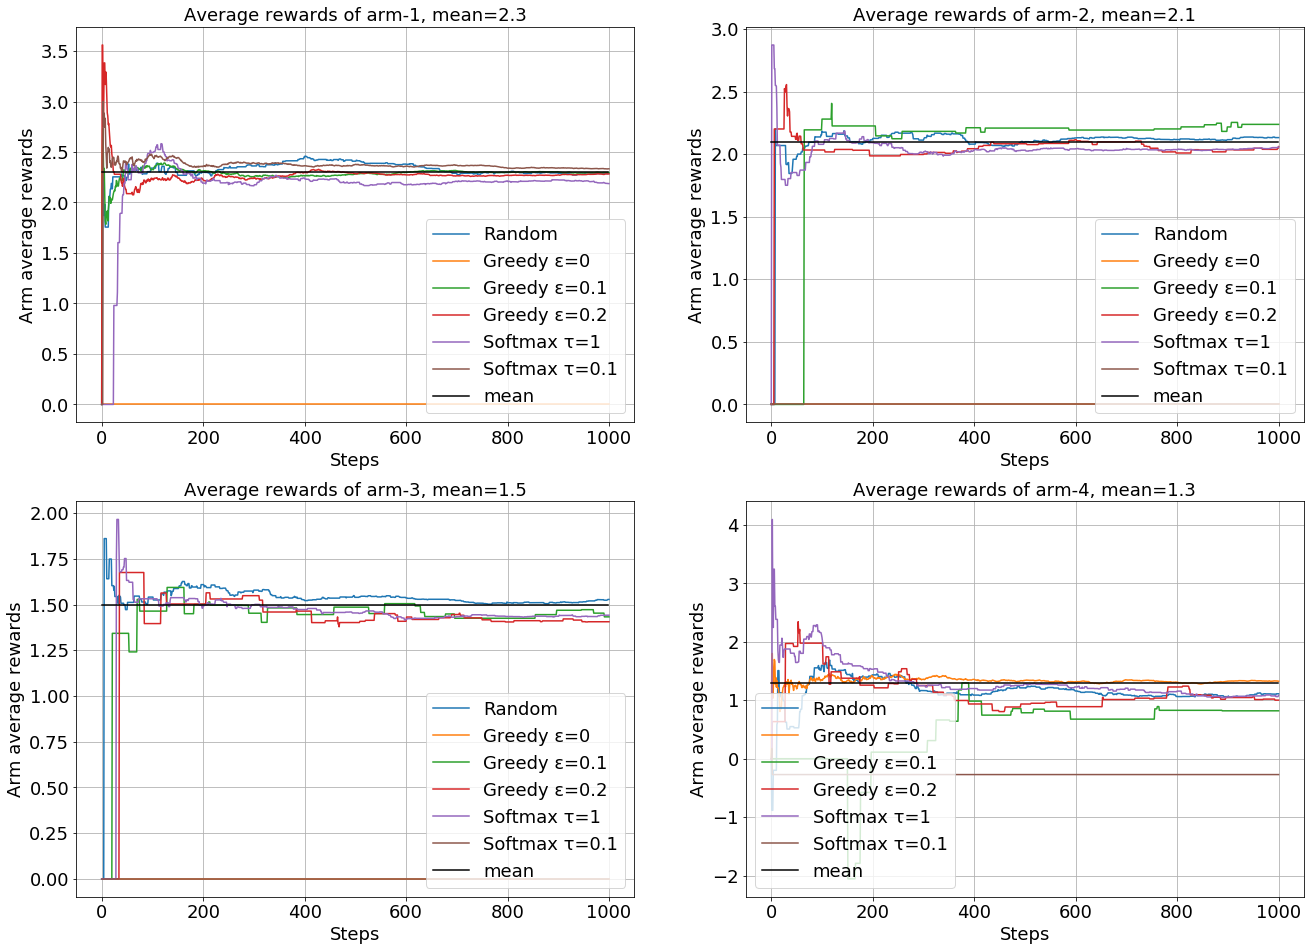

In [615]:
"""average reward of each arm over time"""
K_number = 4
Q_star = [2.3, 2.1, 1.5, 1.3] # Rewards normal probability distribution mean
R_sigma = [0.9, 0.6, 0.4, 2]  # Rewards normal probability distribution standard deviation
T = 1000

arm_1 = [[],[],[],[],[],[]]
arm_2 = [[],[],[],[],[],[]]
arm_3 = [[],[],[],[],[],[]]
arm_4 = [[],[],[],[],[],[]]
data_actions = [[],[],[],[],[],[]]

res1 = Random(K_number, R_sigma, Q_star, T)
arm_1[0]=copy.copy(res1[3][0])
arm_2[0]=copy.copy(res1[3][1])
arm_3[0]=copy.copy(res1[3][2])
arm_4[0]=copy.copy(res1[3][3])
data_actions[0] = res1[4]
    
res2 = Greedy(K_number, R_sigma, Q_star, 0, T)
arm_1[1]=res2[3][0]
arm_2[1]=res2[3][1]
arm_3[1]=res2[3][2]
arm_4[1]=res2[3][3]
data_actions[1] = res2[4]
    
res3 = Greedy(K_number, R_sigma, Q_star, 0.1, T)
arm_1[2]=res3[3][0]
arm_2[2]=res3[3][1]
arm_3[2]=res3[3][2]
arm_4[2]=res3[3][3]
data_actions[2] = res3[4]
    
res4 = Greedy(K_number, R_sigma, Q_star, 0.2, T)
arm_1[3]=res4[3][0]
arm_2[3]=res4[3][1]
arm_3[3]=res4[3][2]
arm_4[3]=res4[3][3]
data_actions[3] = res4[4]
    
res5 = Softmax(K_number, R_sigma, Q_star, 1, T)
arm_1[4]=res5[3][0]
arm_2[4]=res5[3][1]
arm_3[4]=res5[3][2]
arm_4[4]=res5[3][3]
data_actions[4] = res5[4]
    
res6 = Softmax(K_number, R_sigma, Q_star, 0.1, T)
arm_1[5]=res6[3][0]
arm_2[5]=res6[3][1]
arm_3[5]=res6[3][2]
arm_4[5]=res6[3][3]
data_actions[5] = res6[4]

plt.figure(figsize=(22,16))
label_list = ['Random', 'Greedy ε=0', 'Greedy ε=0.1', 'Greedy ε=0.2', 'Softmax τ=1', 'Softmax τ=0.1' ]
plt.subplot(221)
for i in range(6):
    plt.plot(np.arange(len(arm_1[i])), arm_1[i], label=label_list[i])
plt.plot(np.arange(1000), [2.3]*1000, label='mean',color='black')
plt.title('Average rewards of arm-1, mean=2.3', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Arm average rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)

plt.subplot(222)
for i in range(6):
    plt.plot(np.arange(len(arm_2[i])), arm_2[i], label=label_list[i])
plt.plot(np.arange(1000), [2.1]*1000, label='mean',color='black')
plt.title('Average rewards of arm-2, mean=2.1', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Arm average rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)

plt.subplot(223)
for i in range(6):
    plt.plot(np.arange(len(arm_3[i])), arm_3[i], label=label_list[i])
plt.plot(np.arange(1000), [1.5]*1000, label='mean',color='black')
plt.title('Average rewards of arm-3, mean=1.5', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Arm average rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)

plt.subplot(224)
for i in range(6):
    plt.plot(np.arange(len(arm_4[i])), arm_4[i], label=label_list[i])
plt.plot(np.arange(1000), [1.3]*1000, label='mean',color='black')
plt.title('Average rewards of arm-4, mean=1.3', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Arm average rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)
plt.show()

In [616]:
###################################*************************************************************************
###################################*************************************************************************

[1803.7839491585878, 1830.9899574949104, 2210.640835147712, 2176.6294688409725, 1963.419113944562, 1928.7613778175175, 2219.1318680815825, 1934.0812369790306, 2010.9856194436447]
[39.239088428293066, 399.6202617992703, 55.73255604853412, 46.01129491552186, 37.659843674888606, 387.0781692801625, 81.08402239336667, 31.371138017486945, 31.01475400727326]


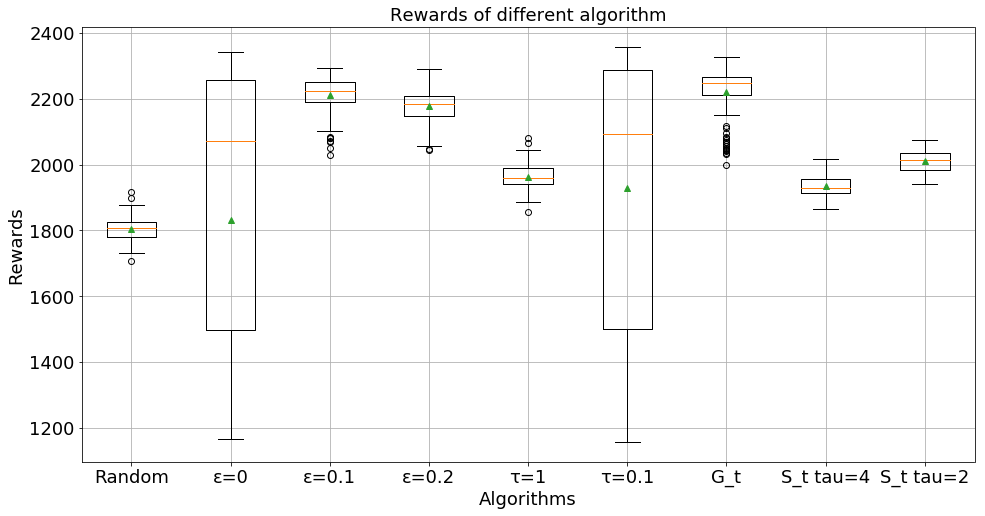

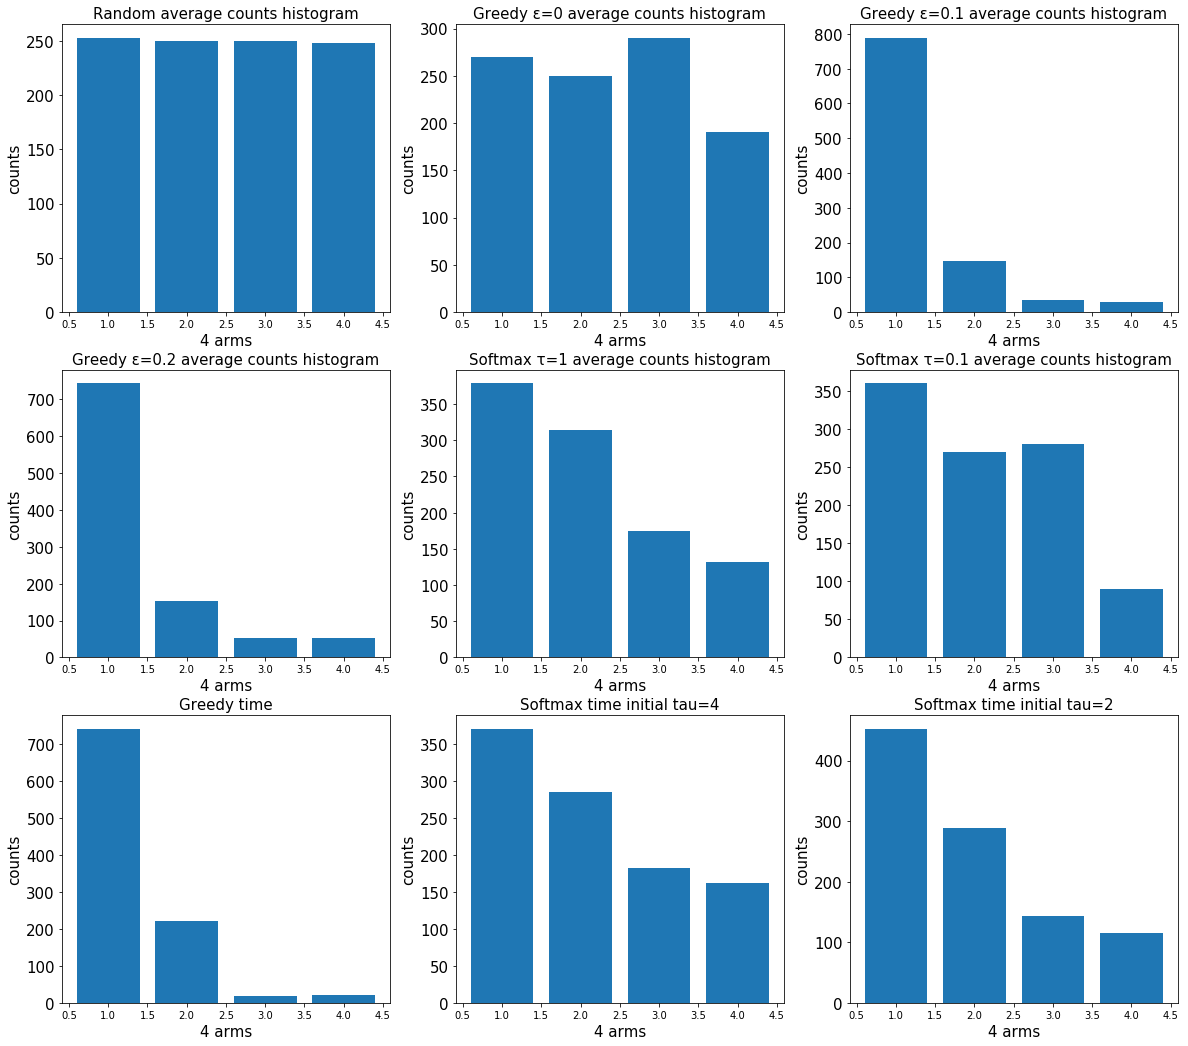

In [617]:
"""adding 2 algos: Average reward, do 100 times"""
K_number = 4
Q_star = [2.3, 2.1, 1.5, 1.3] # Rewards normal probability distribution mean
R_sigma = [0.9, 0.6, 0.4, 2]  # Rewards normal probability distribution standard deviation
T = 1000

data_r = [[],[],[],[],[],[],[],[],[]]
data_count = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
data_mean_count = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]

Times = 0
while Times<100:
    res1 = Random(K_number, R_sigma, Q_star, T)
    data_r[0].append(res1[0])
    for i in range(4):
        data_count[0][i].append(res1[2][i])

    res2 = Greedy(K_number, R_sigma, Q_star, 0, T)
    data_r[1].append(res2[0])
    for i in range(4):
        data_count[1][i].append(res2[2][i])
    
    res3 = Greedy(K_number, R_sigma, Q_star, 0.1, T)
    data_r[2].append(res3[0])
    for i in range(4):
        data_count[2][i].append(res3[2][i])
    
    res4 = Greedy(K_number, R_sigma, Q_star, 0.2, T)
    data_r[3].append(res4[0])
    for i in range(4):
        data_count[3][i].append(res4[2][i])
    
    res5 = Softmax(K_number, R_sigma, Q_star, 1, T)
    data_r[4].append(res5[0])
    for i in range(4):
        data_count[4][i].append(res5[2][i])
    
    res6 = Softmax(K_number, R_sigma, Q_star, 0.1, T)
    data_r[5].append(res6[0])
    for i in range(4):
        data_count[5][i].append(res6[2][i])
        
    res7 = Greedy_time(K_number, R_sigma, Q_star, T)
    data_r[6].append(res7[0])
    for i in range(4):
        data_count[6][i].append(res7[2][i])
     
    res8 = Softmax_time(K_number, R_sigma, Q_star, 4, T)
    data_r[7].append(res8[0])
    for i in range(4):
        data_count[7][i].append(res8[2][i])
        
    res9 = Softmax_time(K_number, R_sigma, Q_star, 2, T)
    data_r[8].append(res9[0])
    for i in range(4):
        data_count[8][i].append(res9[2][i])
    
    Times += 1
    
for i in range(9):
    for j in range(4):
        data_mean_count[i][j] = np.mean(data_count[i][j])
        
"""each algo average rewards plot"""
means = [[],[],[],[],[],[],[],[],[]]
diviations = [[],[],[],[],[],[],[],[],[]]
for i in range(9):
    means[i] = np.mean(data_r[i])
    diviations[i] = np.std(data_r[i])
print(means)
print(diviations)

plt.figure(figsize=(16, 8))
labels = ["Random", "ε=0", "ε=0.1", "ε=0.2", "τ=1", "τ=0.1","G_t","S_t tau=4", "S_t tau=2"]
res = plt.boxplot(data_r, labels = labels, showmeans=True)
plt.title('Rewards of different algorithm', fontsize = 18)
plt.xlabel('Algorithms', fontsize=18)
plt.ylabel('Rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.show()

"""count histogram plot"""
title_list = ['Random average counts histogram', 'Greedy ε=0 average counts histogram', 'Greedy ε=0.1 average counts histogram', 
              'Greedy ε=0.2 average counts histogram', 'Softmax τ=1 average counts histogram', 'Softmax τ=0.1 average counts histogram', 'Greedy time', 
              'Softmax time initial tau=4', 'Softmax time initial tau=2']
plt.figure(figsize=(20,18))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.bar(range(1,5), data_mean_count[i])
    plt.title(title_list[i], fontsize = 15)
    plt.yticks(fontsize=15)
    plt.xlabel('4 arms', fontsize=15)
    plt.ylabel('counts', fontsize=15)
plt.show()

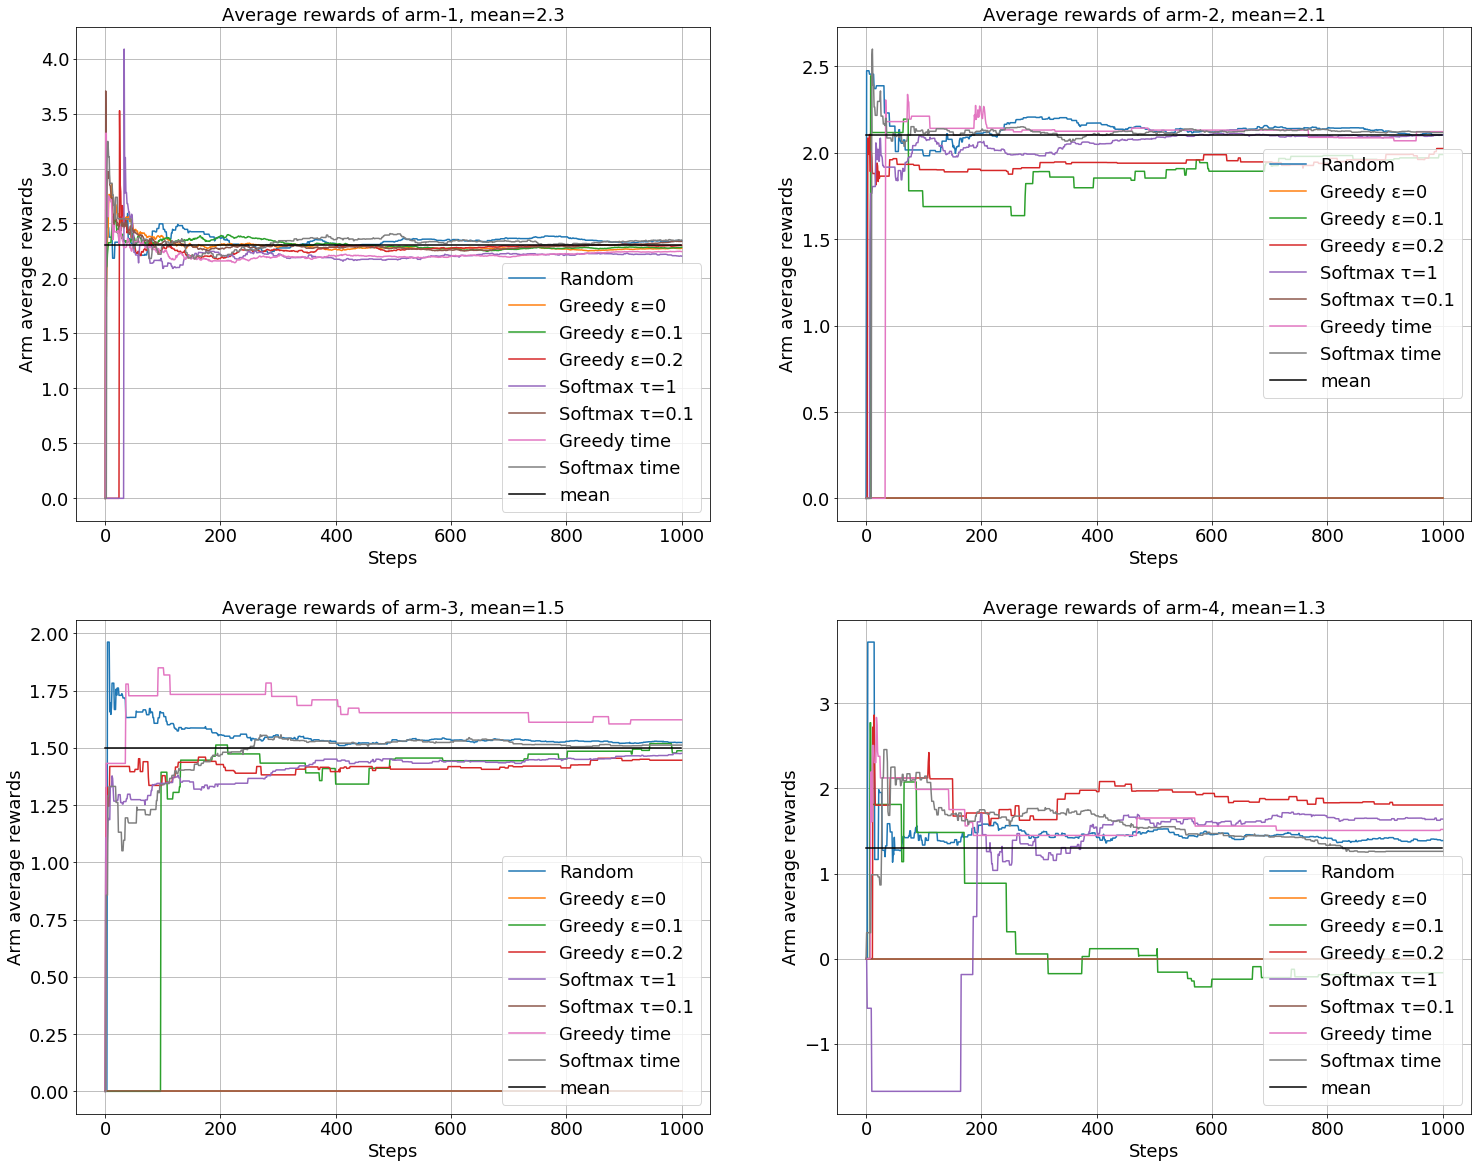

In [619]:
"""adding 2 algos: average reward estimation of each arm over time"""
K_number = 4
Q_star = [2.3, 2.1, 1.5, 1.3] # Rewards normal probability distribution mean
R_sigma = [0.9, 0.6, 0.4, 2]  # Rewards normal probability distribution standard deviation
T = 1000

arm_1 = [[],[],[],[],[],[],[],[]]
arm_2 = [[],[],[],[],[],[],[],[]]
arm_3 = [[],[],[],[],[],[],[],[]]
arm_4 = [[],[],[],[],[],[],[],[]]
data_actions = [[],[],[],[],[],[],[],[]]
best_actions_data = [[],[],[],[],[],[],[],[]]

res1 = Random(K_number, R_sigma, Q_star, T)
arm_1[0]=copy.copy(res1[3][0])
arm_2[0]=copy.copy(res1[3][1])
arm_3[0]=copy.copy(res1[3][2])
arm_4[0]=copy.copy(res1[3][3])
data_actions[0] = res1[4]
best_actions_data[0] = res1[5]

res2 = Greedy(K_number, R_sigma, Q_star, 0, T)
arm_1[1]=res2[3][0]
arm_2[1]=res2[3][1]
arm_3[1]=res2[3][2]
arm_4[1]=res2[3][3]
data_actions[1] = res2[4]
best_actions_data[1] = res2[5]
    
res3 = Greedy(K_number, R_sigma, Q_star, 0.1, T)
arm_1[2]=res3[3][0]
arm_2[2]=res3[3][1]
arm_3[2]=res3[3][2]
arm_4[2]=res3[3][3]
data_actions[2] = res3[4]
best_actions_data[2] = res3[5]
    
res4 = Greedy(K_number, R_sigma, Q_star, 0.2, T)
arm_1[3]=res4[3][0]
arm_2[3]=res4[3][1]
arm_3[3]=res4[3][2]
arm_4[3]=res4[3][3]
data_actions[3] = res4[4]
best_actions_data[3] = res4[5]
    
res5 = Softmax(K_number, R_sigma, Q_star, 1, T)
arm_1[4]=res5[3][0]
arm_2[4]=res5[3][1]
arm_3[4]=res5[3][2]
arm_4[4]=res5[3][3]
data_actions[4] = res5[4]
best_actions_data[4] = res5[5]
    
res6 = Softmax(K_number, R_sigma, Q_star, 0.1, T)
arm_1[5]=res6[3][0]
arm_2[5]=res6[3][1]
arm_3[5]=res6[3][2]
arm_4[5]=res6[3][3]
data_actions[5] = res6[4]
best_actions_data[5] = res6[5]

res7 = Greedy_time(K_number, R_sigma, Q_star, T)
arm_1[6]=res7[3][0]
arm_2[6]=res7[3][1]
arm_3[6]=res7[3][2]
arm_4[6]=res7[3][3]
data_actions[6] = res7[4]
best_actions_data[6] = res7[5]

res8 = Softmax_time(K_number, R_sigma, Q_star, 4, T)
arm_1[7]=res8[3][0]
arm_2[7]=res8[3][1]
arm_3[7]=res8[3][2]
arm_4[7]=res8[3][3]
data_actions[7] = res8[4]
best_actions_data[7] = res8[5]

"""arms rewards list plot"""
plt.figure(figsize=(25,20))
label_list = ['Random', 'Greedy ε=0', 'Greedy ε=0.1', 'Greedy ε=0.2', 'Softmax τ=1', 'Softmax τ=0.1', 
              'Greedy time', 'Softmax time' ]
plt.subplot(221)
for i in range(8):
    plt.plot(np.arange(len(arm_1[i])), arm_1[i], label=label_list[i])
plt.plot(np.arange(1000), [2.3]*1000, label='mean',color='black')
plt.title('Average rewards of arm-1, mean=2.3', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Arm average rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)

plt.subplot(222)
for i in range(8):
    plt.plot(np.arange(len(arm_2[i])), arm_2[i], label=label_list[i])
plt.plot(np.arange(1000), [2.1]*1000, label='mean',color='black')
plt.title('Average rewards of arm-2, mean=2.1', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Arm average rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)

plt.subplot(223)
for i in range(8):
    plt.plot(np.arange(len(arm_3[i])), arm_3[i], label=label_list[i])
plt.plot(np.arange(1000), [1.5]*1000, label='mean',color='black')
plt.title('Average rewards of arm-3, mean=1.5', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Arm average rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)

plt.subplot(224)
for i in range(8):
    plt.plot(np.arange(len(arm_4[i])), arm_4[i], label=label_list[i])
plt.plot(np.arange(1000), [1.3]*1000, label='mean',color='black')
plt.title('Average rewards of arm-4, mean=1.3', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Arm average rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)

plt.show()

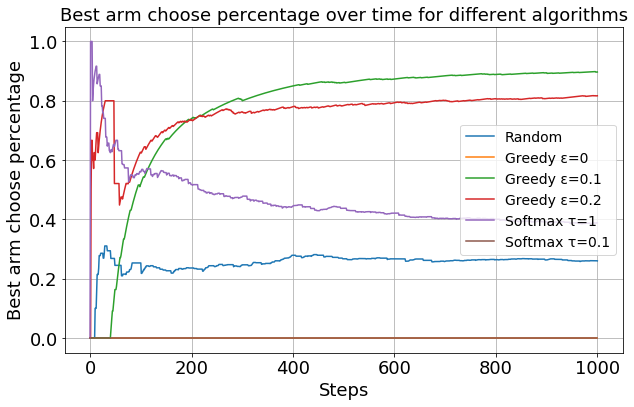

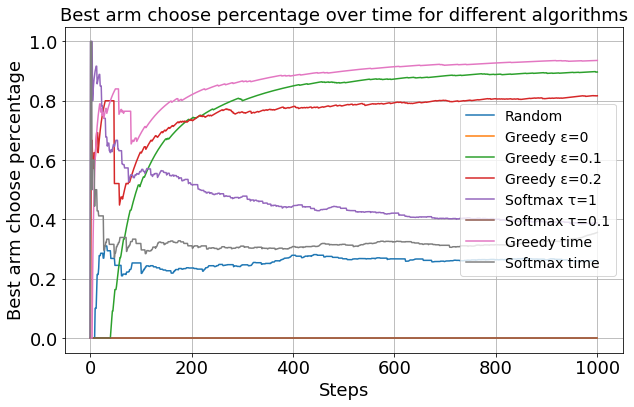

In [621]:
"""Best arm Time-varying algorithm"""
K_number = 4
Q_star = [2.3, 2.1, 1.5, 1.3] # Rewards normal probability distribution mean
R_sigma = [0.9, 0.6, 0.4, 2]  # Rewards normal probability distribution standard deviation
T = 1000

best_actions_data = [[],[],[],[],[],[],[],[]]

res1 = Random(K_number, R_sigma, Q_star, T)
best_actions_data[0] = res1[5]

res2 = Greedy(K_number, R_sigma, Q_star, 0, T)
best_actions_data[1] = res2[5]
    
res3 = Greedy(K_number, R_sigma, Q_star, 0.1, T)
best_actions_data[2] = res3[5]
    
res4 = Greedy(K_number, R_sigma, Q_star, 0.2, T)
best_actions_data[3] = res4[5]
    
res5 = Softmax(K_number, R_sigma, Q_star, 1, T)
best_actions_data[4] = res5[5]
    
res6 = Softmax(K_number, R_sigma, Q_star, 0.1, T)
best_actions_data[5] = res6[5]

res7 = Greedy_time(K_number, R_sigma, Q_star, T)
best_actions_data[6] = res7[5]

res8 = Softmax_time(K_number, R_sigma, Q_star, 4, T)
best_actions_data[7] = res8[5]

"""cov to best action"""
plt.figure(figsize=(10,6))
label_list = ['Random', 'Greedy ε=0', 'Greedy ε=0.1', 'Greedy ε=0.2', 'Softmax τ=1', 'Softmax τ=0.1', 
              'Greedy time', 'Softmax time' ]
x = np.arange(T+1)
for i in range(6):
    y = best_actions_data[i]
    plt.plot(x,y,label=label_list[i])

plt.title('Best arm choose percentage over time for different algorithms', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Best arm choose percentage', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=14, loc='right')
plt.show()


"""cov to best action"""
plt.figure(figsize=(10,6))
label_list = ['Random', 'Greedy ε=0', 'Greedy ε=0.1', 'Greedy ε=0.2', 'Softmax τ=1', 'Softmax τ=0.1', 
              'Greedy time', 'Softmax time' ]
x = np.arange(T+1)
for i in range(8):
    y = best_actions_data[i]
    plt.plot(x,y,label=label_list[i])

plt.title('Best arm choose percentage over time for different algorithms', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Best arm choose percentage', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=14, loc='right')
plt.show()

In [ ]:
#################Doubling the standard deviations#############################################################
###******************

In [622]:
"""Double deviation, Average reward, do 100 times"""
K_number = 4
Q_star = [2.3, 2.1, 1.5, 1.3] # Rewards normal probability distribution mean
R_sigma = [0.9*2, 0.6*2, 0.4*2, 2*2]  # Rewards normal probability distribution standard deviation
T = 1000

data_r = [[],[],[],[],[],[]]
data_count = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
data_mean_count = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]

Times = 0
while Times<100:
    res1 = Random(K_number, R_sigma, Q_star, T)
    data_r[0].append(res1[0])
    for i in range(4):
        data_count[0][i].append(res1[2][i])

    res2 = Greedy(K_number, R_sigma, Q_star, 0, T)
    data_r[1].append(res2[0])
    for i in range(4):
        data_count[1][i].append(res2[2][i])
    
    res3 = Greedy(K_number, R_sigma, Q_star, 0.1, T)
    data_r[2].append(res3[0])
    for i in range(4):
        data_count[2][i].append(res3[2][i])
    
    res4 = Greedy(K_number, R_sigma, Q_star, 0.2, T)
    data_r[3].append(res4[0])
    for i in range(4):
        data_count[3][i].append(res4[2][i])
    
    res5 = Softmax(K_number, R_sigma, Q_star, 1, T)
    data_r[4].append(res5[0])
    for i in range(4):
        data_count[4][i].append(res5[2][i])
    
    res6 = Softmax(K_number, R_sigma, Q_star, 0.1, T)
    data_r[5].append(res6[0])
    for i in range(4):
        data_count[5][i].append(res6[2][i])
    
    Times += 1
    
for i in range(6):
    for j in range(4):
        data_mean_count[i][j] = np.mean(data_count[i][j])

[1797.8311371707275, 1843.1070013425601, 2149.6285583908243, 2133.9038560636864, 1978.9333636188776, 1917.554321835444]
[85.37069403199834, 391.2743222284422, 105.19543597875702, 86.52199999091481, 68.8121314592468, 396.194388067657]


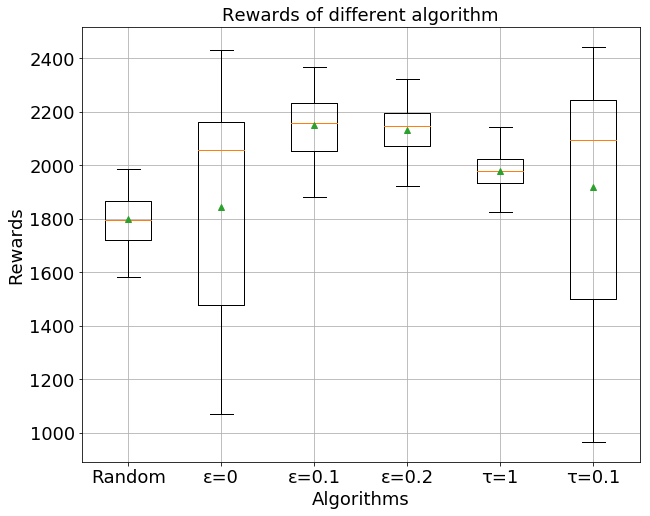

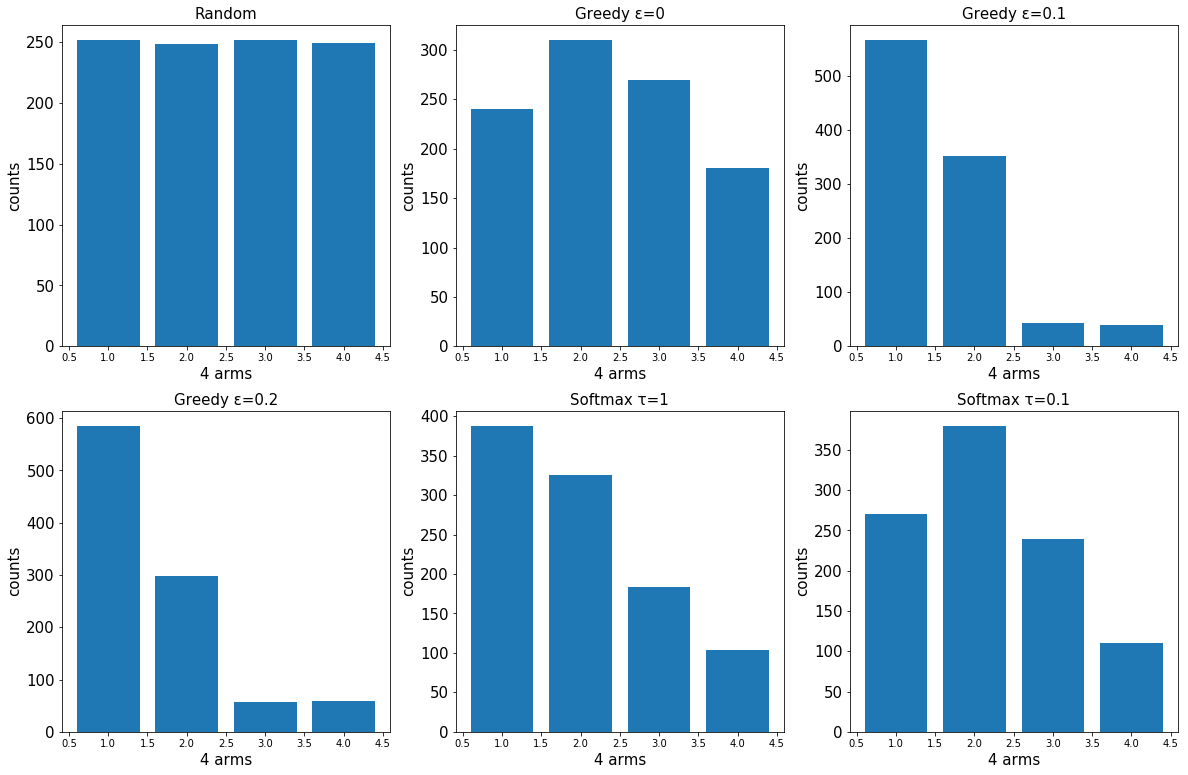

In [623]:
"""each algo average rewards plot"""
means = [[],[],[],[],[],[]]
diviations = [[],[],[],[],[],[]]
for i in range(6):
    means[i] = np.mean(data_r[i])
    diviations[i] = np.std(data_r[i])
print(means)
print(diviations)

plt.figure(figsize=(10, 8))
labels = ["Random", "ε=0", "ε=0.1", "ε=0.2", "τ=1", "τ=0.1"]
res = plt.boxplot(data_r, labels = labels, showmeans=True)
plt.title('Rewards of different algorithm', fontsize = 18)
plt.xlabel('Algorithms', fontsize=18)
plt.ylabel('Rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.show()

"""count histogram plot"""
title_list = ['Random average counts histogram', 'Greedy ε=0 average counts histogram', 'Greedy ε=0.1 average counts histogram', 
              'Greedy ε=0.2 average counts histogram', 'Softmax τ=1 average counts histogram', 'Softmax τ=0.1 average counts histogram']
plt.figure(figsize=(20,13))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.bar(range(1,5), data_mean_count[i])
    plt.title(label_list[i], fontsize = 15)
    plt.yticks(fontsize=15)
    plt.xlabel('4 arms', fontsize=15)
    plt.ylabel('counts', fontsize=15)
plt.show()

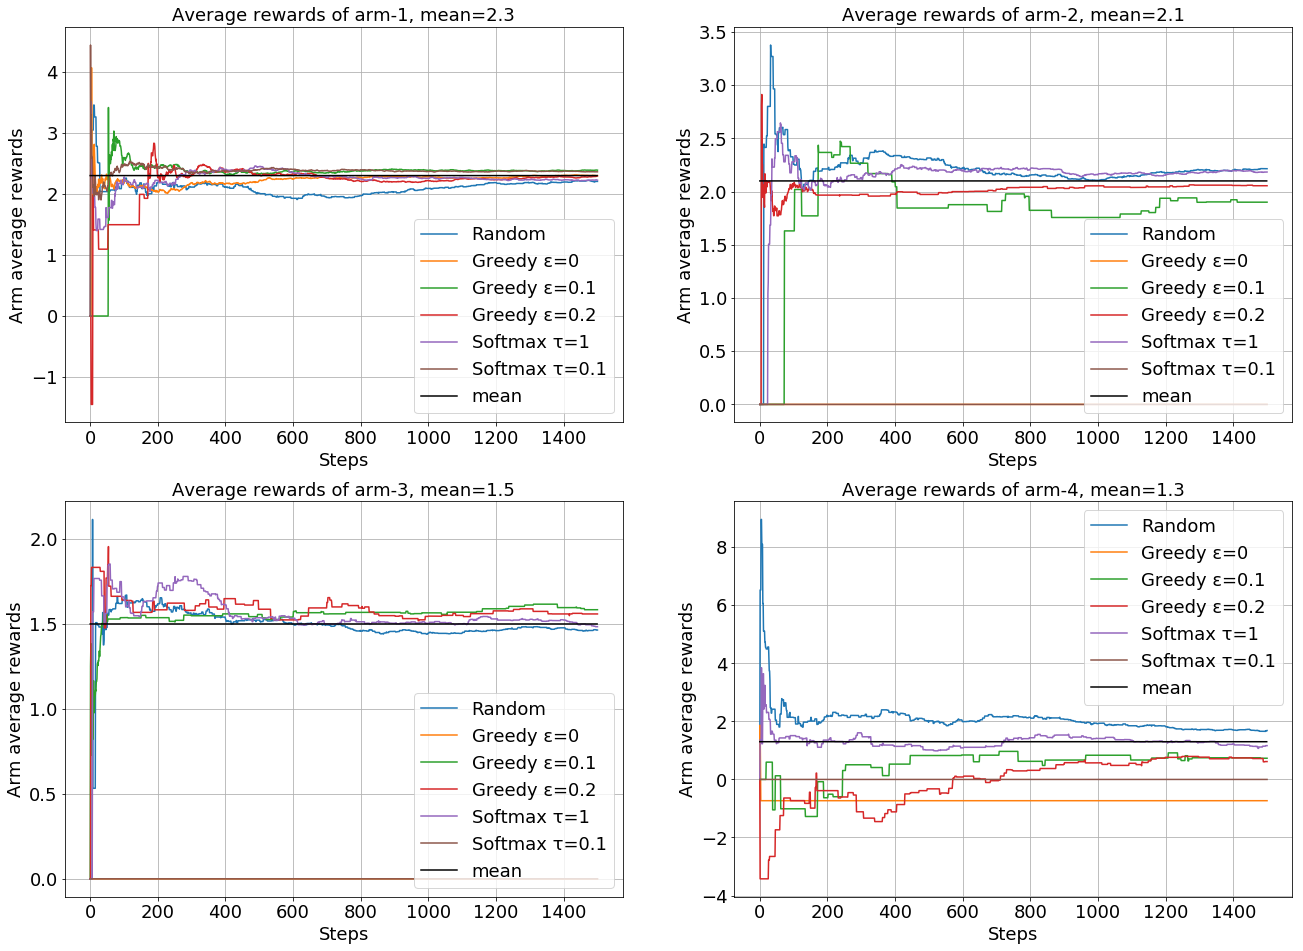

In [624]:
"""Double deviation: average reward of each arm"""
K_number = 4
Q_star = [2.3, 2.1, 1.5, 1.3] # Rewards normal probability distribution mean
R_sigma = [0.9*2, 0.6*2, 0.4*2, 2*2]  # Rewards normal probability distribution standard deviation
T = 1500

arm_1 = [[],[],[],[],[],[]]
arm_2 = [[],[],[],[],[],[]]
arm_3 = [[],[],[],[],[],[]]
arm_4 = [[],[],[],[],[],[]]
data_actions = [[],[],[],[],[],[]]

res1 = Random(K_number, R_sigma, Q_star, T)
arm_1[0]=copy.copy(res1[3][0])
arm_2[0]=copy.copy(res1[3][1])
arm_3[0]=copy.copy(res1[3][2])
arm_4[0]=copy.copy(res1[3][3])
data_actions[0] = res1[4]
    
res2 = Greedy(K_number, R_sigma, Q_star, 0, T)
arm_1[1]=res2[3][0]
arm_2[1]=res2[3][1]
arm_3[1]=res2[3][2]
arm_4[1]=res2[3][3]
data_actions[1] = res2[4]
    
res3 = Greedy(K_number, R_sigma, Q_star, 0.1, T)
arm_1[2]=res3[3][0]
arm_2[2]=res3[3][1]
arm_3[2]=res3[3][2]
arm_4[2]=res3[3][3]
data_actions[2] = res3[4]
    
res4 = Greedy(K_number, R_sigma, Q_star, 0.2, T)
arm_1[3]=res4[3][0]
arm_2[3]=res4[3][1]
arm_3[3]=res4[3][2]
arm_4[3]=res4[3][3]
data_actions[3] = res4[4]
    
res5 = Softmax(K_number, R_sigma, Q_star, 1, T)
arm_1[4]=res5[3][0]
arm_2[4]=res5[3][1]
arm_3[4]=res5[3][2]
arm_4[4]=res5[3][3]
data_actions[4] = res5[4]
    
res6 = Softmax(K_number, R_sigma, Q_star, 0.1, T)
arm_1[5]=res6[3][0]
arm_2[5]=res6[3][1]
arm_3[5]=res6[3][2]
arm_4[5]=res6[3][3]
data_actions[5] = res6[4]

plt.figure(figsize=(22,16))
label_list = ['Random', 'Greedy ε=0', 'Greedy ε=0.1', 'Greedy ε=0.2', 'Softmax τ=1', 'Softmax τ=0.1' ]
plt.subplot(221)
for i in range(6):
    plt.plot(np.arange(len(arm_1[i])), arm_1[i], label=label_list[i])
plt.plot(np.arange(1500), [2.3]*1500, label='mean',color='black')
plt.title('Average rewards of arm-1, mean=2.3', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Arm average rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)

plt.subplot(222)
for i in range(6):
    plt.plot(np.arange(len(arm_2[i])), arm_2[i], label=label_list[i])
plt.plot(np.arange(1500), [2.1]*1500, label='mean',color='black')
plt.title('Average rewards of arm-2, mean=2.1', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Arm average rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)

plt.subplot(223)
for i in range(6):
    plt.plot(np.arange(len(arm_3[i])), arm_3[i], label=label_list[i])
plt.plot(np.arange(1500), [1.5]*1500, label='mean',color='black')
plt.title('Average rewards of arm-3, mean=1.5', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Arm average rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)

plt.subplot(224)
for i in range(6):
    plt.plot(np.arange(len(arm_4[i])), arm_4[i], label=label_list[i])
plt.plot(np.arange(1500), [1.3]*1500, label='mean',color='black')
plt.title('Average rewards of arm-4, mean=1.3', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Arm average rewards', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)
plt.show()

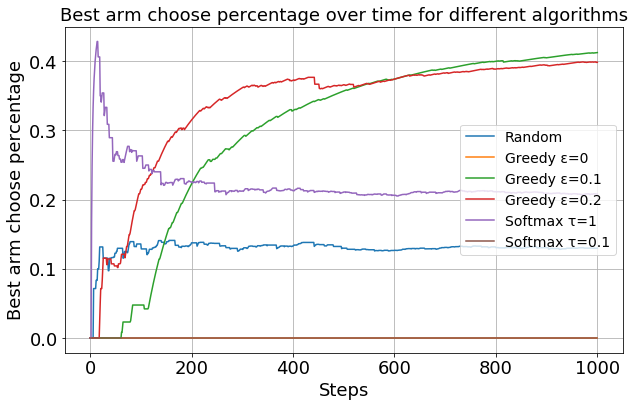

In [628]:
"""average reward of each arm"""
K_number = 4
Q_star = [2.3, 2.1, 1.5, 1.3] # Rewards normal probability distribution mean
R_sigma = [0.9*2, 0.6*2, 0.4*2, 2*2]  # Rewards normal probability distribution standard deviation
T = 1000

best_actions_data = [[],[],[],[],[],[]]
for i in range(6):
    for j in range(1001):
        best_actions_data[i].append(0)

for i in range(1):
    
    res1 = Random(K_number, R_sigma, Q_star, T)
    for j in range(1001):
        best_actions_data[0][j] = ( best_actions_data[0][j] + res1[5][j] )/2
    

    res2 = Greedy(K_number, R_sigma, Q_star, 0, T)
    for j in range(1001):
        best_actions_data[1][j] = ( best_actions_data[1][j] + res2[5][j] )/2

    res3 = Greedy(K_number, R_sigma, Q_star, 0.1, T)
    for j in range(1001):
         best_actions_data[2][j] = ( best_actions_data[2][j] + res3[5][j] )/2

    res4 = Greedy(K_number, R_sigma, Q_star, 0.2, T)
    for j in range(1001):
         best_actions_data[3][j] = ( best_actions_data[3][j] + res4[5][j] )/2

    res5 = Softmax(K_number, R_sigma, Q_star, 1, T)
    for j in range(1001):
         best_actions_data[4][j] = ( best_actions_data[4][j] + res5[5][j] )/2

    res6 = Softmax(K_number, R_sigma, Q_star, 0.1, T)
    for j in range(1001):
         best_actions_data[5][j] = ( best_actions_data[5][j] + res6[5][j] )/2
            
"""cov to best action"""
plt.figure(figsize=(10,6))
label_list = ['Random', 'Greedy ε=0', 'Greedy ε=0.1', 'Greedy ε=0.2', 'Softmax τ=1', 'Softmax τ=0.1', 
              'Greedy time', 'Softmax time' ]
x = np.arange(T+1)
for i in range(6):
    y = best_actions_data[i]
    plt.plot(x,y,label=label_list[i])

plt.title('Best arm choose percentage over time for different algorithms', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Best arm choose percentage', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=14, loc='right')
plt.show()

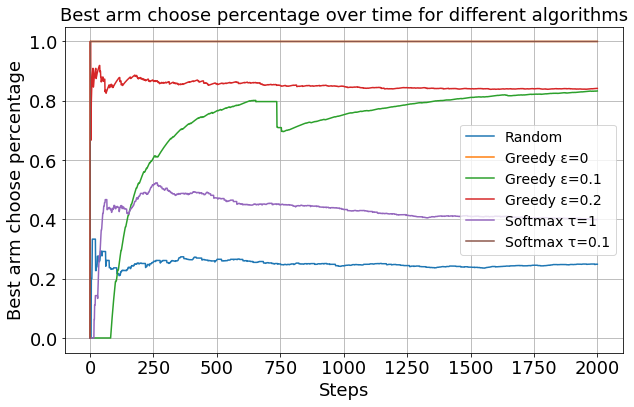

In [631]:
"""Double deviation: best arm"""
K_number = 4
Q_star = [2.3, 2.1, 1.5, 1.3] # Rewards normal probability distribution mean
R_sigma = [0.9*2, 0.6*2, 0.4*2, 2*2]  # Rewards normal probability distribution standard deviation
T = 2000

best_actions_data = [[],[],[],[],[],[]]

res1 = Random(K_number, R_sigma, Q_star, T)
best_actions_data[0] = res1[5]

res2 = Greedy(K_number, R_sigma, Q_star, 0, T)
best_actions_data[1] = res2[5]
    
res3 = Greedy(K_number, R_sigma, Q_star, 0.1, T)
best_actions_data[2] = res3[5]
    
res4 = Greedy(K_number, R_sigma, Q_star, 0.2, T)
best_actions_data[3] = res4[5]
    
res5 = Softmax(K_number, R_sigma, Q_star, 1, T)
best_actions_data[4] = res5[5]
    
res6 = Softmax(K_number, R_sigma, Q_star, 0.1, T)
best_actions_data[5] = res6[5]

"""cov to best action"""
plt.figure(figsize=(10,6))
label_list = ['Random', 'Greedy ε=0', 'Greedy ε=0.1', 'Greedy ε=0.2', 'Softmax τ=1', 'Softmax τ=0.1', 
              'Greedy time', 'Softmax time' ]
x = np.arange(T+1)
for i in range(6):
    y = best_actions_data[i]
    plt.plot(x,y,label=label_list[i])

plt.title('Best arm choose percentage over time for different algorithms', fontsize=18)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Best arm choose percentage', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=14, loc='right')
plt.show()